# ROMY Barometer - Statistic Plots

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from obspy import read_inventory

from andbro__read_sds import __read_sds

In [2]:
from functions.get_mean_promy_pressure import __get_mean_promy_pressure
from functions.get_mean_rmy_pressure import __get_mean_rmy_pressure

In [3]:
#%matplotlib tk

In [6]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/ontap-ffb-bay200/'
    lamont_path = '/home/andbro/lamont/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'

## Configurations

In [7]:
config = {}

# output path for figures
config['path_to_figs'] = data_path+"romy_baro/figures/"

# path to data archive
config['path_to_data'] = data_path+"romy_baro/data/"



## Load Data

In [8]:
df = pd.read_pickle(config['path_to_data']+"RB_statistics.pkl")

In [9]:
df = df[df.status == False]

In [10]:
df.keys()

Index(['t1', 't2', 'status', 'shift_PP_N', 'shift_PP_E', 'shift_HP_N',
       'shift_HP_E', 'cmax_PP_N', 'cmax_PP_E', 'cmax_HP_N', 'cmax_HP_E', 'r_z',
       'r_n', 'r_e', 'a_z', 'a_n', 'a_e', 'b_z', 'b_n', 'b_e'],
      dtype='object')

In [11]:
for k in ["shift_PP_N", "shift_PP_E", "shift_HP_N", "shift_HP_E"]:
    df[k] = df[k]/20 # 20 Hz sampling rate


In [12]:
df = df[df.b_e != 0]

In [13]:
df

t1                           t2  status  \
5    2024-03-20T10:00:00.000000Z  2024-03-20T13:00:00.000000Z   False   
6    2024-03-20T12:00:00.000000Z  2024-03-20T15:00:00.000000Z   False   
7    2024-03-20T14:00:00.000000Z  2024-03-20T17:00:00.000000Z   False   
8    2024-03-20T16:00:00.000000Z  2024-03-20T19:00:00.000000Z   False   
9    2024-03-20T18:00:00.000000Z  2024-03-20T21:00:00.000000Z   False   
..                           ...                          ...     ...   
726  2024-05-19T12:00:00.000000Z  2024-05-19T15:00:00.000000Z   False   
727  2024-05-19T14:00:00.000000Z  2024-05-19T17:00:00.000000Z   False   
728  2024-05-19T16:00:00.000000Z  2024-05-19T19:00:00.000000Z   False   
729  2024-05-19T18:00:00.000000Z  2024-05-19T21:00:00.000000Z   False   
730  2024-05-19T20:00:00.000000Z  2024-05-19T23:00:00.000000Z   False   

     shift_PP_N  shift_PP_E  shift_HP_N  shift_HP_E  cmax_PP_N  cmax_PP_E  \
5        305.35      305.70      316.50      316.85  -0.471735   0.460636   
6         -8.45       -9.80        3.95        3.45   0.476377  -0.644840   
7        200.65      200.85      -13.45      216.75   0.485367  -0.531434   
8         13.35      232.00       -1.80      250.25   0.649619  -0.526094   
9        -16.70      -19.10       -0.20       -1.90  -0.657024   0.716506   
..          ...         ...         ...         ...        ...        ...   
726       98.85     -266.10      114.85     -252.70  -0.487962  -0.499900   
727     -112.75       89.85     -374.80       72.90  -0.351292  -0.369837   
728      344.90      344.80        5.20      358.10   0.405775  -0.394370   
729      -15.40      -17.45       -0.05       -3.25  -0.435549   0.553501   
730      189.00      189.15      174.30      173.85   0.551102  -0.574702   

     cmax_HP_N  cmax_HP_E    r_z    r_n    r_e           a_z           a_n  \
5    -0.398151   0.426207   0.80   2.36   0.02 -9.717576e-10  3.793764e-10   
6     0.524297  -0.719420   3.80  30.09  51.24  1.984356e-10  4.221364e-10   
7    -0.489494  -0.521901  17.24  23.77  21.02  4.422012e-09  1.973574e-09   
8    -0.752568  -0.478488   9.52  56.97  20.15  2.092322e-09  8.135236e-10   
9    -0.732277   0.793500   1.96  53.61  62.44  1.627550e-10  3.204592e-11   
..         ...        ...    ...    ...    ...           ...           ...   
726  -0.494102  -0.445909   8.77   4.87   2.65 -2.473783e-09 -7.137793e-09   
727   0.355340   0.381294   3.03  10.49   2.44 -2.364066e-08  1.291673e-09   
728   0.359421  -0.336514  16.90  12.17   8.34 -1.324114e-09  2.552930e-09   
729  -0.453086   0.607082  14.79  20.68  35.70 -2.332288e-10 -1.039539e-10   
730  -0.507402   0.518685   5.91   5.20   9.90 -1.120567e-09  1.990964e-09   

              a_e           b_z           b_n           b_e  
5   -4.923054e-11 -4.739563e-10 -4.741586e-10  8.184295e-11  
6   -5.700585e-10  1.285908e-10  3.074946e-10 -7.515947e-10  
7   -3.115843e-09 -8.267794e-11 -8.369094e-10  6.782994e-10  
8   -1.558574e-09  1.286106e-09 -4.139254e-09  1.827819e-09  
9   -3.063653e-10  8.854346e-12 -3.492356e-09  2.021941e-09  
..            ...           ...           ...           ...  
726 -2.162679e-09 -4.350767e-07 -2.053282e-09  1.201026e-08  
727 -5.363073e-09 -4.392012e-09  3.930080e-09  7.752588e-09  
728 -1.115716e-09 -7.387099e-10  5.412358e-09 -2.774174e-09  
729 -6.325608e-10 -9.056873e-10 -1.970268e-09  2.112834e-09  
730 -2.343547e-09 -2.081920e-10 -2.934919e-09  2.019813e-09  

[638 rows x 20 columns]

In [35]:
# select only those with VR > 50 %
# df2 = df[(df.r_z > 50) & (df.r_n > 50) & (df.r_e > 50)]

# select only those with CC > 0.7
dfN = df[(df.cmax_PP_N > 0.7) | (df.cmax_HP_N > 0.7)]
dfE = df[(df.cmax_PP_E > 0.7) | (df.cmax_HP_E > 0.7)]
dfZ = df[(df.cmax_PP_Z > 0.7) | (df.cmax_HP_Z > 0.7)]


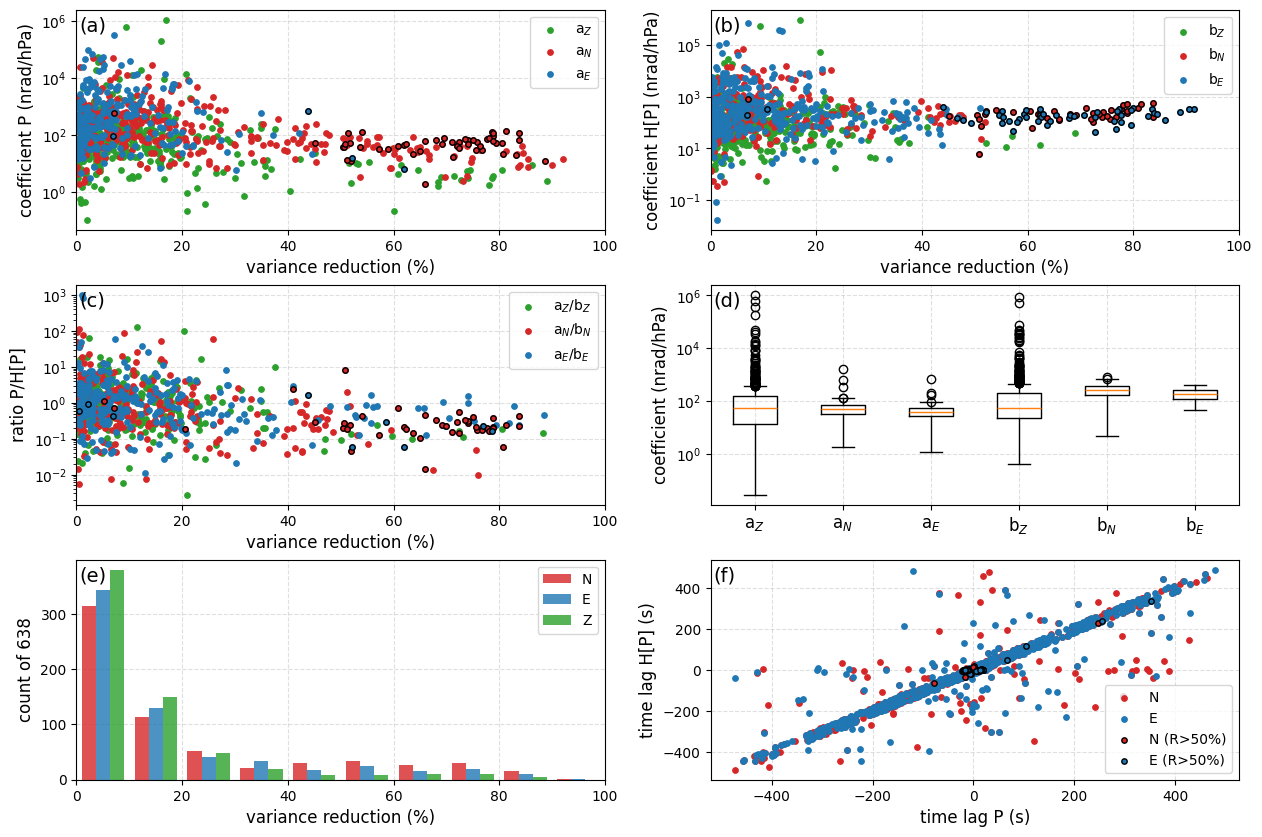

In [37]:
def __makeplot():

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    colors = {"Z":"tab:green", "N":"tab:red", "E":"tab:blue"}

    Nrow, Ncol = 3, 2

    font = 12

    scale, unit = 1e11, "nrad/hPa"

    hil = r"H[P]"

    fig = plt.figure(figsize=(15, 10))

    gs = GridSpec(Nrow, Ncol, figure=fig, hspace=0.25)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])

    # ___________________________________________________
    ax0.scatter(df.r_z, df.a_z*scale, s=15, color=colors["Z"], label=r"a$_Z$", zorder=2)
    ax0.scatter(df.r_n, df.a_n*scale, s=15, color=colors["N"], label=r"a$_N$", zorder=2)
    ax0.scatter(df.r_e, df.a_e*scale, s=15, color=colors["E"], label=r"a$_E$", zorder=2)
    # ax0.scatter(df2.r_z, df2.a_z*scale, s=15, color=colors["Z"], zorder=2, edgecolor="k")
    ax0.scatter(dfN.r_n, dfN.a_n*scale, s=15, color=colors["N"], zorder=2, edgecolor="k")
    ax0.scatter(dfE.r_e, dfE.a_e*scale, s=15, color=colors["E"], zorder=2, edgecolor="k")
    ax0.legend(fontsize=font-2)
    ax0.set_yscale("log")
    ax0.set_xlim(0, 100)
    ax0.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax0.set_ylabel(f"coefficient P ({unit})", fontsize=font)

    # ___________________________________________________
    ax1.scatter(df.r_z, df.b_z*scale, s=15, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax1.scatter(df.r_n, df.b_n*scale, s=15, color=colors["N"], label=r"b$_N$", zorder=2)
    ax1.scatter(df.r_e, df.b_e*scale, s=15, color=colors["E"], label=r"b$_E$", zorder=2)
    # ax1.scatter(df2.r_z, df2.b_z*scale, s=15, color=colors["Z"], zorder=2, edgecolor="k")
    ax1.scatter(dfN.r_n, dfN.b_n*scale, s=15, color=colors["N"], zorder=2, edgecolor="k")
    ax1.scatter(dfE.r_e, dfE.b_e*scale, s=15, color=colors["E"], zorder=2, edgecolor="k")
    ax1.legend(fontsize=font-2)
    ax1.set_yscale("log")
    ax1.set_xlim(0, 100)
    ax1.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax1.set_ylabel(f"coefficient {hil} ({unit})", fontsize=font)

    # ___________________________________________________
    ax2.scatter(df.r_z, (df.a_z*scale)/(df.b_z*scale), s=15, color=colors["Z"], label=r"a$_Z$/b$_Z$", zorder=2)
    ax2.scatter(df.r_n, (df.a_n*scale)/(df.b_n*scale), s=15, color=colors["N"], label=r"a$_N$/b$_N$", zorder=2)
    ax2.scatter(df.r_e, (df.a_e*scale)/(df.b_e*scale), s=15, color=colors["E"], label=r"a$_E$/b$_E$", zorder=2)
    # ax2.scatter(df2.r_z, (df2.a_z*scale)/(df2.b_z*scale), s=15, color=colors["Z"], zorder=2, edgecolor="k")
    ax2.scatter(dfN.r_n, (dfN.a_n*scale)/(dfN.b_n*scale), s=15, color=colors["N"], zorder=2, edgecolor="k")
    ax2.scatter(dfE.r_e, (dfE.a_e*scale)/(dfE.b_e*scale), s=15, color=colors["E"], zorder=2, edgecolor="k")
    ax2.legend(fontsize=font-2)
    # ax2.set_ylim(-2, 2)
    ax2.set_xlim(0, 100)
    ax2.set_yscale("log")
    ax2.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax2.set_ylabel(f"ratio P/{hil}", fontsize=font)

    # ___________________________________________________
    # ax3.boxplot([abs(df.a_z*scale), abs(df.a_n*scale), abs(df.a_e*scale), abs(df.b_z*scale), abs(df.b_n*scale), abs(df.b_e*scale)],)
    ax3.boxplot([abs(df.a_z*scale), abs(dfN.a_n*scale), abs(dfE.a_e*scale), abs(df.b_z*scale), abs(dfN.b_n*scale), abs(dfE.b_e*scale)],)
    ax3.set_yscale("log")
    ax3.set_xticklabels([r"a$_Z$", r"a$_N$", r"a$_E$", r"b$_Z$", r"b$_N$", r"b$_E$"], fontsize=font)
    ax3.set_ylabel(f"coefficient ({unit})", fontsize=font)

    # ___________________________________________________
    ax4.hist([df.r_n, df.r_e, df.r_z], bins=10, range=[0, 100], alpha=0.8,
             rwidth=0.8, align="mid", density=False, zorder=2,
             color=[colors["N"], colors["E"], colors["Z"]], label=["N","E","Z"],
            )
    ax4.grid(alpha=0.2, ls="--", zorder=0)
    ax4.set_xlim(0, 100)
    ax4.legend(fontsize=font-2)
    ax4.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax4.set_ylabel(f"count of {df.shape[0]}", fontsize=font)

    # ___________________________________________________
    # ax5.scatter(df.r_z, df.a_z, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax5.scatter(df.shift_PP_N, df.shift_HP_N, s=15, color=colors["N"], label=r"N", zorder=2)
    ax5.scatter(df.shift_PP_E, df.shift_HP_E, s=15, color=colors["E"], label=r"E", zorder=2)
    ax5.scatter(dfN.shift_PP_N, dfN.shift_HP_N, s=15, color=colors["N"], label=r"N (R>50%)", zorder=2, edgecolor="k")
    ax5.scatter(dfE.shift_PP_E, dfE.shift_HP_E, s=15, color=colors["E"], label=r"E (R>50%)", zorder=2, edgecolor="k")
    ax5.legend(fontsize=font-2, loc=4)
    # ax5.set_ylim(-2, 2)
    # ax5.set_xlim(0, 100)
    ax5.set_xlabel(f"time lag P (s)", fontsize=font)
    ax5.set_ylabel(f"time lag {hil} (s)", fontsize=font)

    ax0.text(.005, .97,"(a)", ha='left', va='top', transform=ax0.transAxes, fontsize=font+2)
    ax1.text(.005, .97,"(b)", ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.005, .97,"(c)", ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)
    ax3.text(.005, .97,"(d)", ha='left', va='top', transform=ax3.transAxes, fontsize=font+2)
    ax4.text(.005, .97,"(e)", ha='left', va='top', transform=ax4.transAxes, fontsize=font+2)
    ax5.text(.005, .97,"(f)", ha='left', va='top', transform=ax5.transAxes, fontsize=font+2)


    axes = [ax0, ax1, ax2, ax3, ax4, ax5]
    for ax in axes:
        ax.grid(ls="--", alpha=0.4, zorder=0)


    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RB_statistic_plots.png", format="png", dpi=150, bbox_inches='tight')
